#Business Problem:

Increasing the prospect customers by optimising the cost for next Marketing campaign. 

Cost reduction -  number of calls optimisation
Getting Right Target list or finding customes who are less likely dont subscribe customers from the data to increase sales 

In [30]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/New folder (3)/bank-additional/bank-additional-full.csv', sep=';')


In [64]:
df1 = df.copy()
df1.shape
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
# Remove the duration column since it is prone to data leakage
df1 = df1.drop('duration', 1)

In [65]:
# Encode it as integer for machine learning algorithms
df1 = df1.replace({"y" : {"no" : 0, "yes" : 1}})
df1.y.value_counts().to_frame()


,y
0,36548
1,4640


In [7]:
#separate integer variables 
df1_int = df1[['age','campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

for i in df1_int:
    df1[i] = pd.to_numeric(df1[i])
    

In [8]:
#separate categorical variables 
df1_cat = df1[['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']]

for i in df1_cat:
    df1[i] = df1_cat[i].astype('category')

In [10]:
#getting the dependent variable counts on each categorical variable

for i in df1_cat:
    counts = pd.DataFrame(df1[i].value_counts().to_frame())
    print(counts)

                 job
admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
retired         1720
entrepreneur    1456
self-employed   1421
housemaid       1060
unemployed      1014
student          875
unknown          330
          marital
married     24928
single      11568
divorced     4612
unknown        80
                     education
university.degree        12168
high.school               9515
basic.9y                  6045
professional.course       5243
basic.4y                  4176
basic.6y                  2292
unknown                   1731
illiterate                  18
         default
no         32588
unknown     8597
yes            3
          loan
no       33950
yes       6248
unknown    990
           contact
cellular     26144
telephone    15044
     month
may  13769
jul   7174
aug   6178
jun   5318
nov   4101
apr   2632
oct    718
sep    570
mar    546
dec    182
     day_of_week
thu         8623
mon         8514
w

In [11]:
#cross tabulation of categorical variable to dependent variable

for i in df1_cat.loc[:, df1_cat.columns != 'y']:
    cross_tab = pd.crosstab(df1_cat[i], df1_cat['y'],margins=True)
    print(cross_tab)

y                  0     1    All
job                              
admin.          9070  1352  10422
blue-collar     8616   638   9254
entrepreneur    1332   124   1456
housemaid        954   106   1060
management      2596   328   2924
retired         1286   434   1720
self-employed   1272   149   1421
services        3646   323   3969
student          600   275    875
technician      6013   730   6743
unemployed       870   144   1014
unknown          293    37    330
All            36548  4640  41188
y             0     1    All
marital                     
divorced   4136   476   4612
married   22396  2532  24928
single     9948  1620  11568
unknown      68    12     80
All       36548  4640  41188
y                        0     1    All
education                              
basic.4y              3748   428   4176
basic.6y              2104   188   2292
basic.9y              5572   473   6045
high.school           8484  1031   9515
illiterate              14     4     18
profess

<Figure size 720x288 with 0 Axes>

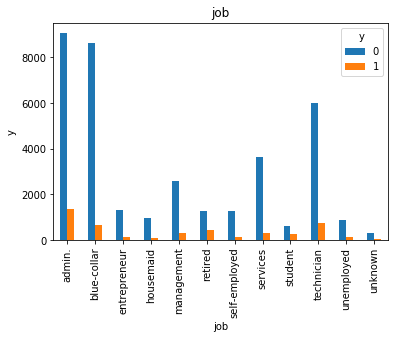

<Figure size 720x288 with 0 Axes>

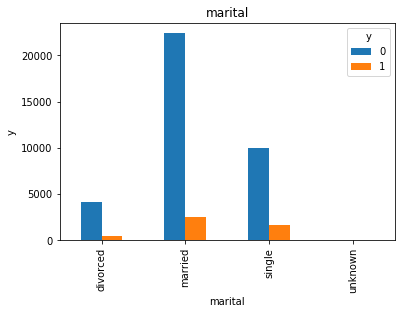

<Figure size 720x288 with 0 Axes>

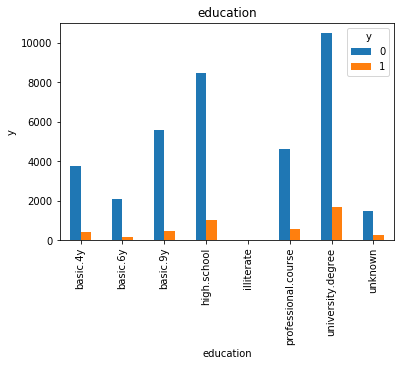

<Figure size 720x288 with 0 Axes>

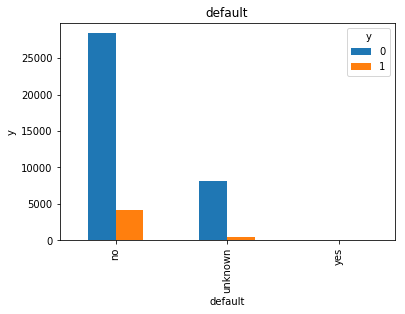

<Figure size 720x288 with 0 Axes>

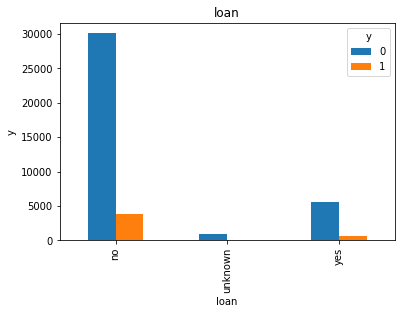

<Figure size 720x288 with 0 Axes>

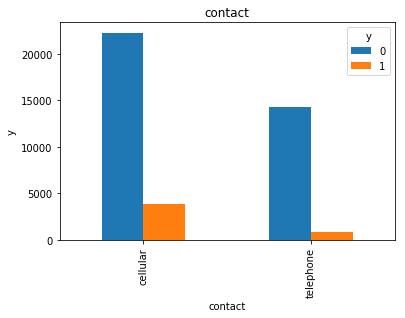

<Figure size 720x288 with 0 Axes>

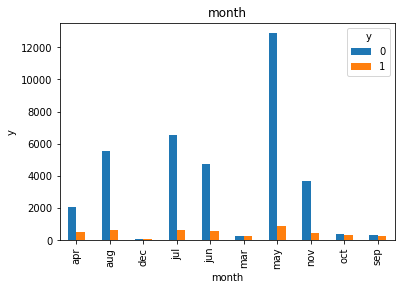

<Figure size 720x288 with 0 Axes>

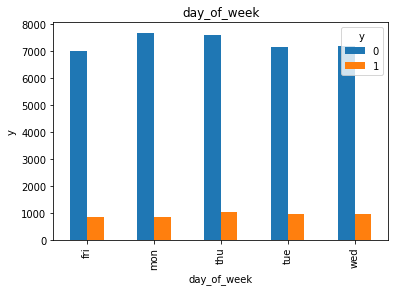

<Figure size 720x288 with 0 Axes>

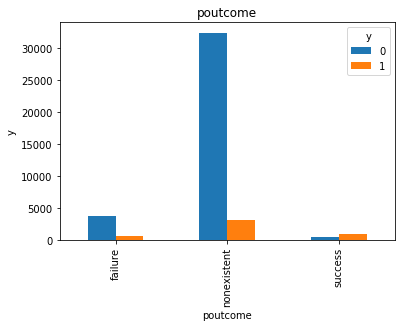

In [25]:
#potting cross tabs for categorical variables

import matplotlib.pyplot as plt


for i in df1_cat.loc[:, df1_cat.columns != 'y']:
    plt.figure(figsize=(10, 4))
    #df1_cat[i].value_counts().plot(kind='bar')
    pd.crosstab(df1_cat[i], df1_cat['y']).plot(kind = 'bar')
    plt.ylabel('y', fontsize=10)
    plt.title(i, fontsize=12)
    plt.show()

    

-Admin,technicians, students, retired people subscribed more
-Married People Subscribed more

-high school and University degree people have more subscribing
-people who has no Personal Loan has subscribed more

-People who has no default credit has high subscription %
-Cellular Communication type has more subcribers- 83% of the subscription were obtained by calling to client's cellular phones

-Month of the year over subscribing

-May has more subcribers
-% subcription is better for MArch september, october.


- Exploring Numerical Variables


In [13]:
#cross tabulation of numerical variables

for i in df1_int.loc[:, df1_int.columns != 'y']:
    cross_tab = pd.crosstab(df1[i], df1['y'],margins=True)
    print(cross_tab)


y        0     1    All
age                    
17       3     2      5
18      16    12     28
19      22    20     42
20      42    23     65
21      73    29    102
22     101    36    137
23     178    48    226
24     377    86    463
25     505    93    598
26     576   122    698
27     737   114    851
28     850   151   1001
29    1267   186   1453
30    1512   202   1714
31    1727   220   1947
32    1662   184   1846
33    1623   210   1833
34    1561   184   1745
35    1592   167   1759
36    1626   154   1780
37    1338   137   1475
38    1264   143   1407
39    1318   114   1432
40    1077    84   1161
41    1165   113   1278
42    1051    91   1142
43     967    88   1055
44     934    77   1011
45    1011    92   1103
46     951    79   1030
..     ...   ...    ...
66      28    29     57
67      15    11     26
68      18    15     33
69      20    14     34
70      28    19     47
71      32    21     53
72      21    13     34
73      21    13     34
74      17    15

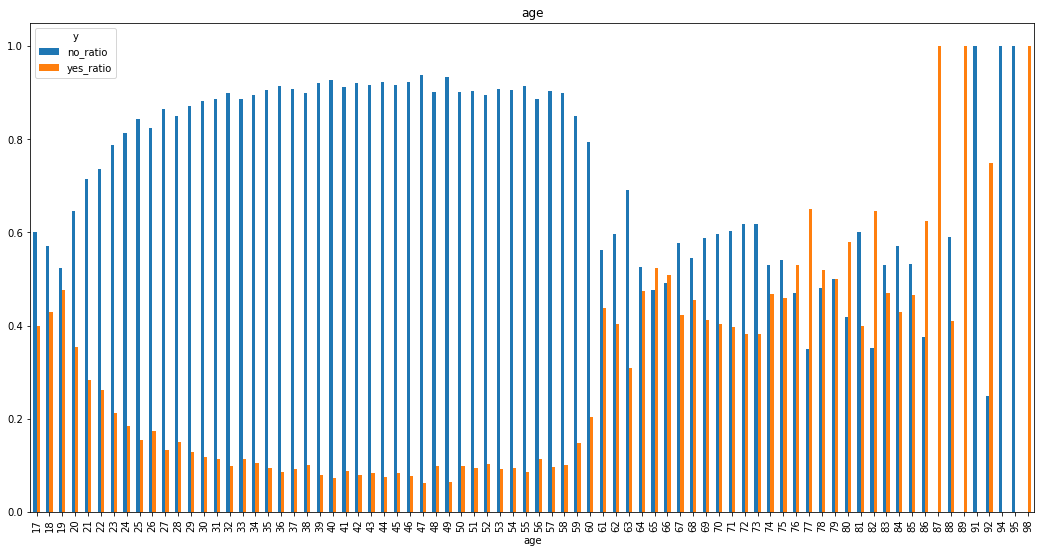

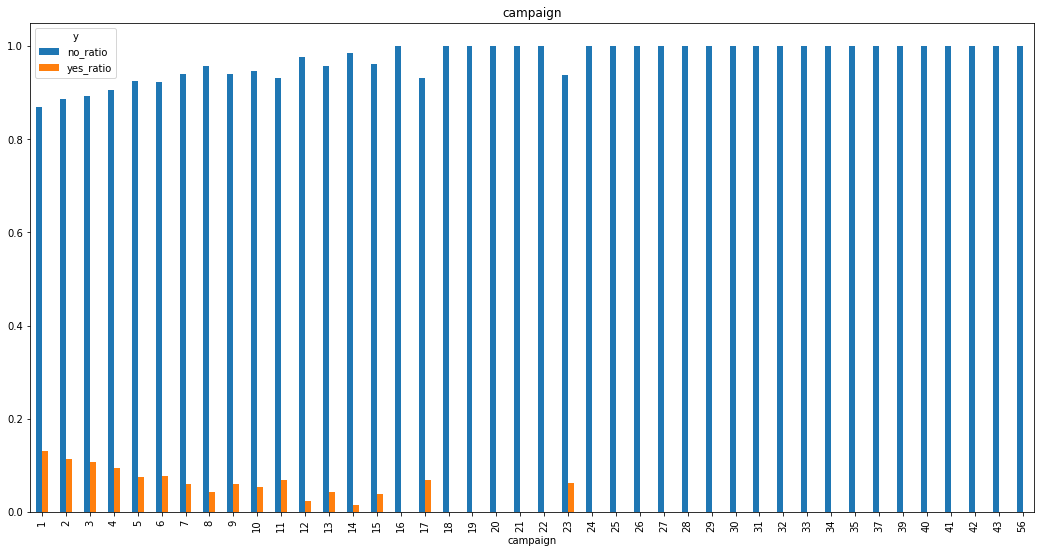

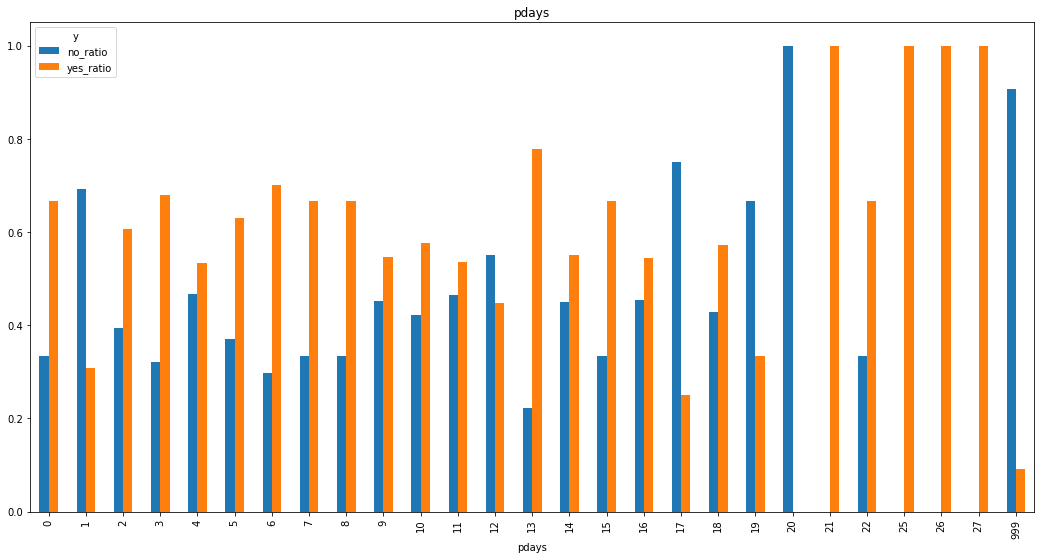

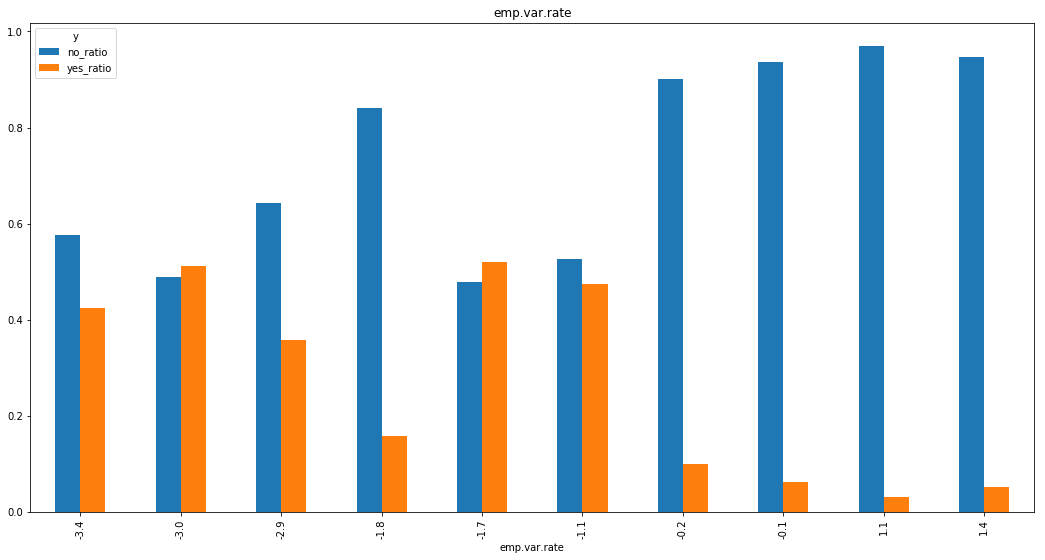

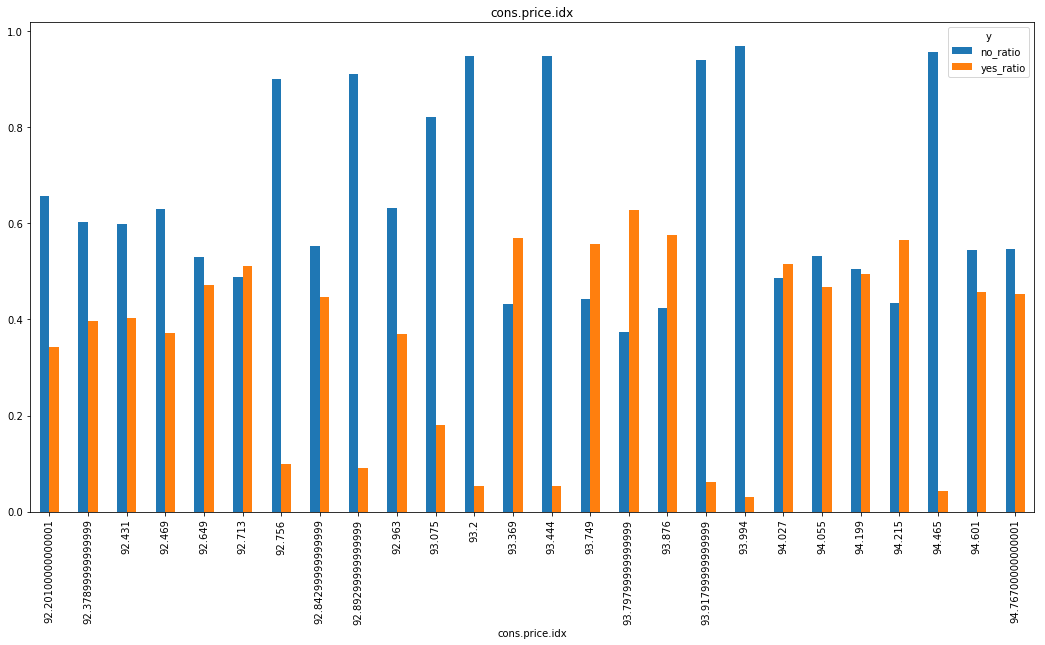

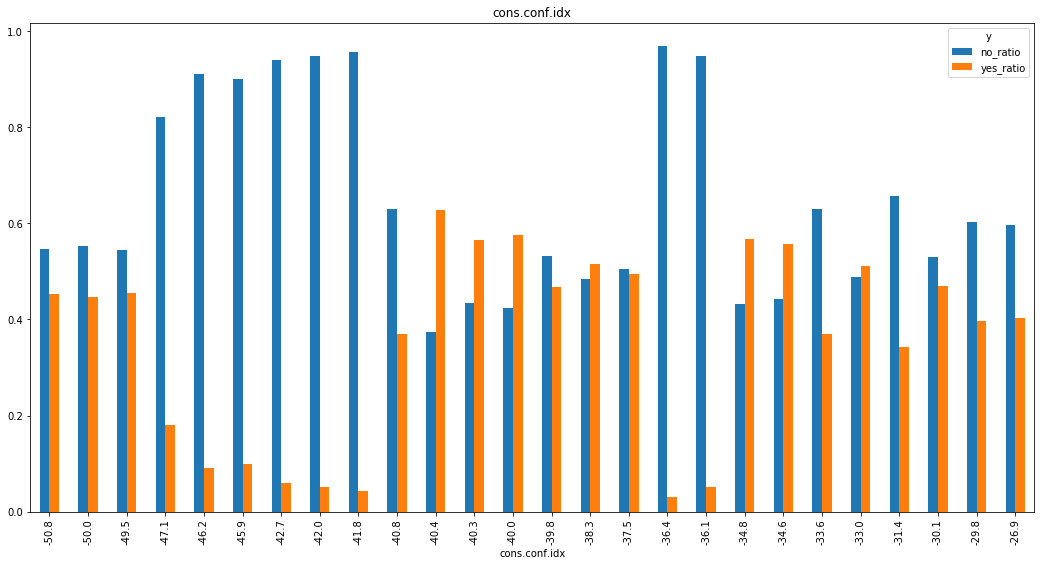

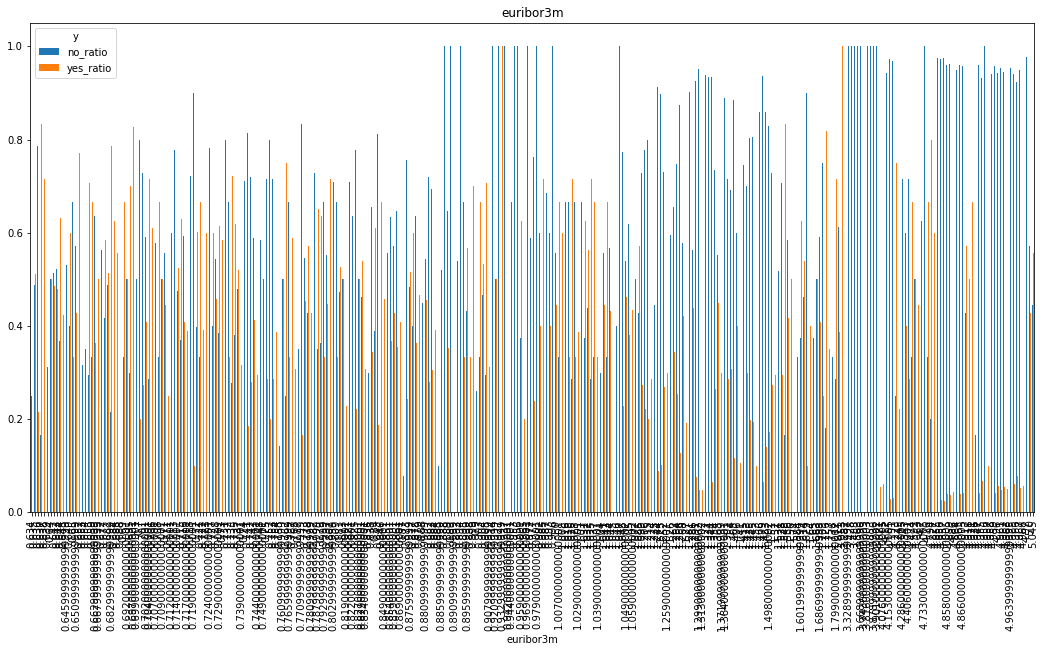

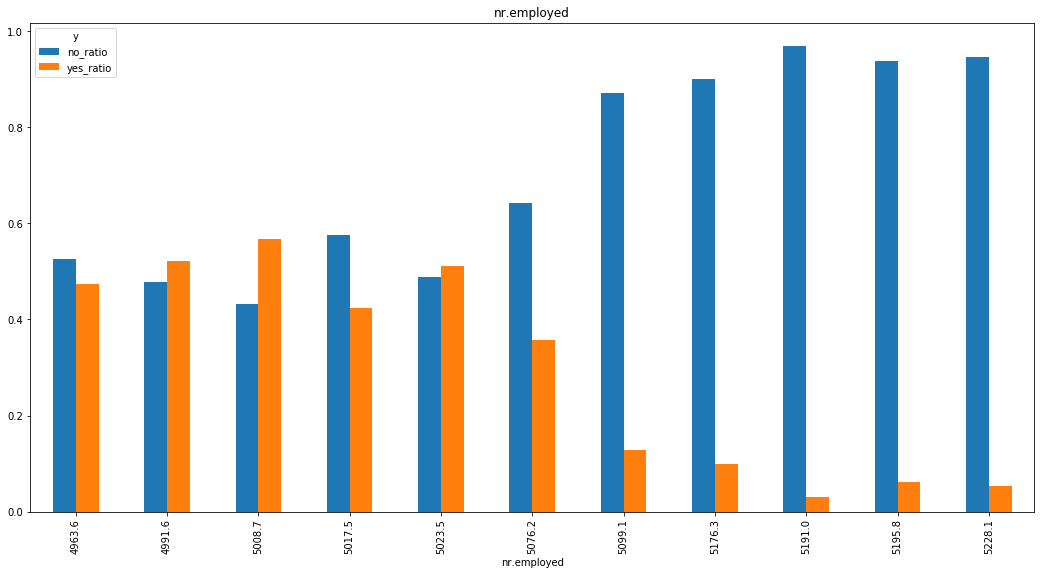

In [21]:
# ploting the % cross tabulation of dependent variable for all numerical varibles 

import matplotlib.pyplot as plt


def crosstab_plot(variable1, variable2):
    """
    this function plots crosstab bar plot between 2 categorical variables
    """
    cross_tab = pd.crosstab(df1[variable1], df1[variable2])
    cross_tab["total"] = cross_tab.iloc[:, 0] + cross_tab.iloc[:, 1]
    cross_tab["no_ratio"] = cross_tab.iloc[:, 0] / cross_tab.iloc[:, 2]
    cross_tab["yes_ratio"] = cross_tab.iloc[:, 1] / cross_tab.iloc[:, 2]
    cross_tab.iloc[:, 3:].plot(kind = "bar", title = i, figsize = (18, 9))
    plt.show()
    

df1_int1 = ['age','campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# df1_int1 = ['age']
for i in df1_int1:
    crosstab_plot(i, "y")

Age - From the above plot we observe that Prospect clients are falling below 25 and above 60

 Campaign - Lesser the number of contacts performed during this campaign and for this client higher is the subscription rate

Pdays - According to the above plot prospect clients are taking an approximately 27 
number of days to pass by after the he was last contacted from a previous campaign

- There plot shows that there were more subscribers when interest rates were low.

- The lower the employment number is, the more subscribers.

In [67]:
#Performing minmax scaler on numeric features.

from IPython.display import display
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
numeric = ["age","campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
features_min_max_transform = pd.DataFrame(data=df1)
features_min_max_transform[numeric] = scaler.fit_transform(features_min_max_transform[numeric])
display(features_min_max_transform.head())



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [68]:
from sklearn import preprocessing, neighbors, svm, tree


# Values must be assigned a number value to be used by machine learning algorithms
# LabelEncoder assigns variables to numbers for us
lbl = preprocessing.LabelEncoder()

# Converting job values to integers
lbl.fit(np.unique(list(features_min_max_transform['job'].values)))
features_min_max_transform['job'] = lbl.transform(list(features_min_max_transform['job'].values))

# Converting marital values to integers
lbl.fit(np.unique(list(features_min_max_transform['marital'].values)))
features_min_max_transform['marital'] = lbl.transform(list(features_min_max_transform['marital'].values))

# Converting education values to integers
lbl.fit(np.unique(list(features_min_max_transform['education'].values)))
features_min_max_transform['education'] = lbl.transform(list(features_min_max_transform['education'].values))

# We can also map values to an integer value using a dictionary instead of LabelEncoder
# Mapping default values to integers
features_min_max_transform['default'] = features_min_max_transform['default'].map({'no': 0, 'yes': 1, 'unknown': 2})

# Mapping housing values to integers
features_min_max_transform['housing'] = features_min_max_transform['housing'].map({'no': 0, 'yes': 1, 'unknown': 2})

# Mapping loan values to integers
features_min_max_transform['loan'] = features_min_max_transform['loan'].map({'no': 0, 'yes': 1, 'unknown': 2})

# Mapping contact values to integers
#features_min_max_transform['contact'] = features_min_max_transform['contact'].map({'telephone': 0, 'cellular': 1, 'unknown': 2})

# Converting month values to integers
lbl.fit(np.unique(list(features_min_max_transform['month'].values)))
features_min_max_transform['month'] = lbl.transform(list(features_min_max_transform['month'].values))

# Converting poutcome values to integers
#features_min_max_transform['poutcome'] = features_min_max_transform['poutcome'].map({'failure': 0, 'success': 1, 'other': 2, 'unknown': 3})


In [70]:
data = features_min_max_transform.copy()


In [79]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [78]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,3,1,0,0,0,0,telephone,6,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,7,1,3,2,0,0,telephone,6,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,7,1,3,0,1,0,telephone,6,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0,1,1,0,0,0,telephone,6,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,7,1,3,0,0,1,telephone,6,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [80]:
# Convert our data frame to multidimensional arrays
# The X variable is an array of the independent variables and drops column 'y'
X = np.array(data.drop(['y','poutcome','contact','duration','day_of_week'], 1))

# The y variable is an array of the dependent variable 'y'
y = np.array(data['y'])

In [81]:
from sklearn.model_selection import train_test_split

# Shuffle and partition our data into 80% train data and 20% test data.
# Choosing which model to use for our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Choosing which model to use for our data
clf = RandomForestClassifier(n_estimators=100)

In [83]:
# Training the data
clf.fit(X_train, y_train)

# Scoring the model
accuracy = clf.score(X_test, y_test)

# Printing the score of the model
print(accuracy)

0.8885651857246905


In [98]:
#Testing the predictions
prediction = clf.predict(X_test)
data['y_prediction'] = clf.predict(X)

print(data.head())

        age  job  marital  education  default  housing  loan    contact  \
0  0.481481    3        1          0        0        0     0  telephone   
1  0.493827    7        1          3        2        0     0  telephone   
2  0.246914    7        1          3        0        1     0  telephone   
3  0.283951    0        1          1        0        0     0  telephone   
4  0.481481    7        1          3        0        0     1  telephone   

   month day_of_week       ...         previous     poutcome  emp.var.rate  \
0      6         mon       ...              0.0  nonexistent        0.9375   
1      6         mon       ...              0.0  nonexistent        0.9375   
2      6         mon       ...              0.0  nonexistent        0.9375   
3      6         mon       ...              0.0  nonexistent        0.9375   
4      6         mon       ...              0.0  nonexistent        0.9375   

   cons.price.idx cons.conf.idx  euribor3m  nr.employed  y  y_prediction  \
0   

In [94]:
# ROC curve, AUC and confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score


In [99]:

print(confusion_matrix(y_test, prediction))
# Compute predicted probabilities with predict_proba 
y_pred_prob = rfc_model.predict_proba(X_test)[:,1]

# Compute and print AUC scoreprint(classification_report(y_test, prediction))

[[7062  212]
 [ 706  258]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      7274
          1       0.55      0.27      0.36       964

avg / total       0.87      0.89      0.87      8238



In [100]:

# Compute predicted probabilities with predict_proba 
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7695906069134997


Though the AUC is 76% Random Forest Model has given 91% non subscriber precision rate and 27% subscriber Recall rate

In [101]:
clf = RandomForestClassifier(n_estimators=64, min_samples_split=0.1, max_features=0.41, class_weight='balanced', random_state=51, n_jobs=-1)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

print(confusion_matrix(y_test, clf_predict))
print(classification_report(y_test, clf_predict))


[[6274 1000]
 [ 379  585]]
             precision    recall  f1-score   support

          0       0.94      0.86      0.90      7274
          1       0.37      0.61      0.46       964

avg / total       0.88      0.83      0.85      8238



In [102]:
# Compute predicted probabilities with predict_proba 
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Compute and print AUC score 
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7865762301244585


Now, AUC is 78% Random Forest Model has given 94% non subscriber precision rate and 61% subscriber Recall rate

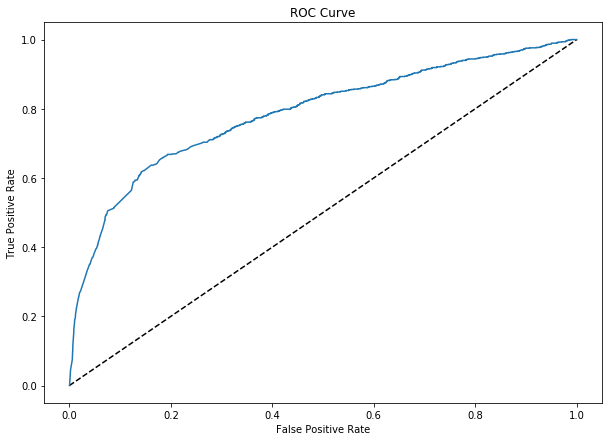

In [103]:
# Compute predicted probabilities with predict_proba 
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [88]:
clf_dt = tree.DecisionTreeClassifier()

# Training the data
clf_dt.fit(X_train, y_train)

# Scoring the model
accuracy_dt = clf.score(X_test, y_test)

# Printing the score of the model
print(accuracy_dt)

0.8885651857246905


In [89]:
#Testing the predictions
prediction = clf_dt.predict(X)
data['y_prediction_dt'] = clf_dt.predict(X)

print(data.head())

        age  job  marital  education  default  housing  loan    contact  \
0  0.481481    3        1          0        0        0     0  telephone   
1  0.493827    7        1          3        2        0     0  telephone   
2  0.246914    7        1          3        0        1     0  telephone   
3  0.283951    0        1          1        0        0     0  telephone   
4  0.481481    7        1          3        0        0     1  telephone   

   month day_of_week       ...         previous     poutcome  emp.var.rate  \
0      6         mon       ...              0.0  nonexistent        0.9375   
1      6         mon       ...              0.0  nonexistent        0.9375   
2      6         mon       ...              0.0  nonexistent        0.9375   
3      6         mon       ...              0.0  nonexistent        0.9375   
4      6         mon       ...              0.0  nonexistent        0.9375   

   cons.price.idx cons.conf.idx  euribor3m  nr.employed  y  y_prediction  \
0   

Now after data balancing we were able to increase our recall rate to 67%, meaning that now we are able to predict 67% of all the actual subscribers. 

In addition, the precision rate for non-subscribers is 94%, meaning that when we predict a non-subscriber our model will be correct 94% of the time.

Comparing to the decision trees model, we obtained a better non-subscriber precision rate and subscriber recall rate with a slight decrease in AUC. Thus, overall, offering a better model to according to the bank's plan.